### About the dataset

This dataset contains ratings for ten thousand popular books.
Ratings go from one to five.
Both book IDs and user IDs are contiguous. For books, they are 1-10000, for users, 1-53424. All users have made at least two ratings.

There are also books marked to read by the users, book metadata (author, year, etc.) and tags.

- to_read.csv provides IDs of the books marked "to read" by each user, as userid, book_id pairs
- book_tags.csv contains tags(genres) assigned by users to books. Tags in this file are represented by their IDs
- tags.csv translates tag IDs to names
- ratings.csv contains ratings

This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:
- books marked to read by the users
- book metadata (author, year, etc.)
- tags (genres)

Book Metadata:
- Book IDs
- ISBN
- Authors
- Publication Year
- Title (with information on the book’s Saga)
- Original Title (book title only)
- Language
- Rating information
- Average Rating
- Number of Total Ratings
- Number of Ratings per Rating Value (1 - 5)
- Number of Text Reviews
- Image URL

Types of techniques
- Collabrative filtering
- Content based recommendation
- Sentiment analysis

 Objective - To build a Book Recommender System using this dataset which will recommend books to read

Libraries
- Pandas
- Numpy
- Seaborn
- Matplotlib


Visualisations 
- Barplot: performs a comparison of metric values
- Heatmap: helps visualise magnitude
- Histogram: organizes a group of data points into user-specified ranges

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
ratings = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\ratings.csv')
books = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\books.csv')
booktags = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\book_tags.csv')
tags = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\tags.csv')

In [66]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [67]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [68]:
tags.tag_name.value_counts()

-               1
oz              1
p-d-f           1
p-d-eastman     1
p-cornwell      1
               ..
farm-life       1
farm-animals    1
farm            1
farley-mowat    1
ｆａｖｏｕｒｉｔｅｓ      1
Name: tag_name, Length: 34252, dtype: int64

In [69]:
# Since tag IDs and tag names are in different files we will join the csv files of book_tags and tags
Alltags = pd.merge(booktags,tags)

In [70]:
books.shape 

(10000, 23)

23 columns

In [71]:
ratings.shape

(981756, 3)

3 columns

In [72]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [73]:
# Unique values in dataset
ratings.nunique()

book_id    10000
user_id    53424
rating         5
dtype: int64

### Exploratory Data Analysis

In [74]:
# Checking for missing values
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [75]:
ratings.rating.value_counts() # Ratings no.

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [76]:
ratings.book_id.value_counts() # Ratings per book

1       100
5198    100
5215    100
5214    100
9803    100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: book_id, Length: 10000, dtype: int64

In [77]:
# Checking for missing values
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### We observe that books have null values whereas ratings dont

In [78]:
# Removing unneccessary columns from books
books.drop("isbn", axis=1, inplace=True)
books.drop("isbn13",inplace=True, axis=1)
books.drop("image_url",inplace=True, axis=1)
books.drop("small_image_url",inplace=True, axis=1)
books.drop("books_count",inplace=True, axis=1)
books.drop("original_title",inplace=True, axis=1)
books.drop("original_publication_year",inplace=True, axis=1)
books.drop("best_book_id",inplace=True, axis=1)

In [80]:
books.isnull().sum()

id                            0
book_id                       0
work_id                       0
authors                       0
title                         0
language_code              1084
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
dtype: int64

In [81]:
books = books.fillna(books.mode().iloc[0]) # replaced missing values with most occuring values in the column

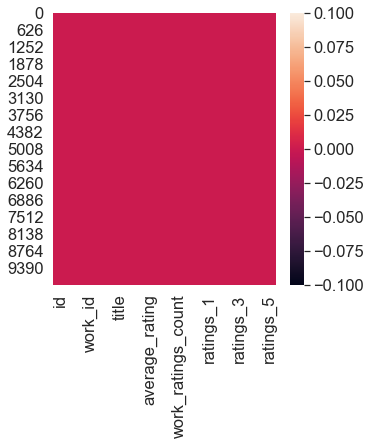

In [82]:
# We cross check after filling the missing values with the most occuring values in the column
plt.figure(figsize=(5,5))
sns.heatmap(books.isnull())
plt.show()

We would have observed white spaces in the heatmap if null values were present. 
Since there are none, that means there are no null values

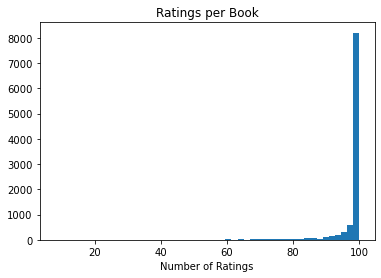

In [25]:
plt.hist(ratings.book_id.value_counts(), bins=50)
plt.title("Ratings per Book")
plt.xlabel("Number of Ratings")
plt.show()

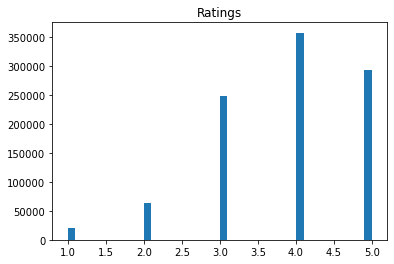

In [117]:
plt.hist(ratings['rating'], bins=40)
plt.title("Ratings")
plt.show()

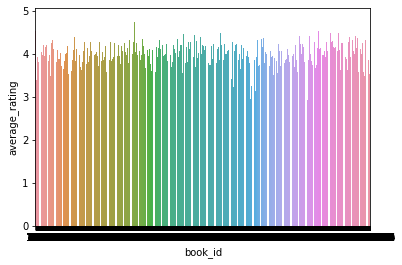

In [79]:
sns.barplot(y="average_rating", x="book_id" , data=books)

In [95]:
# Displaying list of books
i=0
for tn in books['title']:
    print(i,tn)
    i = i + 1    

0 The Hunger Games (The Hunger Games, #1)
1 Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
2 Twilight (Twilight, #1)
3 To Kill a Mockingbird
4 The Great Gatsby
5 The Fault in Our Stars
6 The Hobbit
7 The Catcher in the Rye
8 Angels & Demons  (Robert Langdon, #1)
9 Pride and Prejudice
10 The Kite Runner
11 Divergent (Divergent, #1)
12 1984
13 Animal Farm
14 The Diary of a Young Girl
15 The Girl with the Dragon Tattoo (Millennium, #1)
16 Catching Fire (The Hunger Games, #2)
17 Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
18 The Fellowship of the Ring (The Lord of the Rings, #1)
19 Mockingjay (The Hunger Games, #3)
20 Harry Potter and the Order of the Phoenix (Harry Potter, #5)
21 The Lovely Bones
22 Harry Potter and the Chamber of Secrets (Harry Potter, #2)
23 Harry Potter and the Goblet of Fire (Harry Potter, #4)
24 Harry Potter and the Deathly Hallows (Harry Potter, #7)
25 The Da Vinci Code (Robert Langdon, #2)
26 Harry Potter and the Half-Blood Prince (Harry P

1743 The Love Dare
1744 Goodnight Nobody
1745 The Death and Life of Charlie St. Cloud
1746 How to Stop Worrying and Start Living
1747 Born in Fire (Born In Trilogy, #1)
1748 Animal Dreams
1749 Reason to Breathe (Breathing, #1)
1750 The Mortal Instruments Boxed Set: City of Bones; City of Ashes; City of Glass (The Mortal Instruments, #1-3)
1751 If Tomorrow Comes (Tracy Whitney Series, #1)
1752 M.C. Escher: The Graphic Work
1753 Pope Joan
1754 Birdsong
1755 Faith of the Fallen (Sword of Truth, #6)
1756 Keys to the Demon Prison (Fablehaven, #5)
1757 Moonwalking with Einstein: The Art and Science of Remembering Everything
1758 While I Was Gone
1759 4th of July (Women's Murder Club, #4)
1760 The Time Paradox (Artemis Fowl, #6)
1761 Clifford the Big Red Dog
1762 Bitterblue (Graceling Realm, #3)
1763 The Sky Is Everywhere
1764 Wyrd Sisters (Discworld, #6; Witches #2)
1765 Real (Real, #1)
1766 NOS4A2
1767 The Tenant of Wildfell Hall
1768 The Black Stallion (The Black Stallion, #1)
1769 Reckles

3493 On the Jellicoe Road
3494 The Natural Way to Draw
3495 Streams of Silver (Forgotten Realms: Icewind Dale, #2; Legend of Drizzt, #5)
3496 Angry Housewives Eating Bon Bons
3497 Flora and Ulysses: The Illuminated Adventures
3498 If You Could See Me Now
3499 The Known World
3500 Giovanni's Room
3501 Absolute Boyfriend, Vol. 1
3502 The Gods of Guilt (Mickey Haller, #6; Harry Bosch Universe, #23)
3503 Swann's Way (In Search of Lost Time, #1)
3504 The Little Mouse, the Red Ripe Strawberry, and the Big Hungry Bear
3505 Cerulean Sins (Anita Blake, Vampire Hunter, #11)
3506 Eva Luna
3507 Robopocalypse (Robopocalypse, #1)
3508 Fear Nothing (Moonlight Bay, #1)
3509 First Drop of Crimson (Night Huntress World, #1)
3510 Plum Lucky (Stephanie Plum, #13.5)
3511 This Charming Man
3512 The 8th Confession (Women's Murder Club, #8)
3513 The Secret Diary of Adrian Mole, Aged 13 3/4  (Adrian Mole, #1)
3514 The Razor's Edge
3515 Amphigorey (Amphigorey, #1)
3516 Neil Gaiman's Neverwhere
3517 Some Girls B

5360 Memories, Dreams, Reflections
5361 Bullet (Anita Blake, Vampire Hunter #19)
5362 The Scottish Prisoner (Lord John Grey, #3)
5363 Reunion (The Mediator, #3)
5364 بيكاسو وستاربكس
5365 Laughable Loves
5366 The Secret Diaries of Miss Miranda Cheever (Bevelstoke, #1)
5367 The Constitution of the United States of America
5368 Gustav Klimt: 1862-1918
5369 Under the Volcano
5370 Sleep Tight
5371 Dinosaurs Before Dark (Magic Tree House, #1)
5372 Have Space Suit—Will Travel
5373 The Sea Wolf
5374 Darkest Hour (The Mediator, #4)
5375 Hark! A Vagrant
5376 The Dive From Clausen's Pier
5377 Death in Venice
5378 The Tibetan Book of Living and Dying
5379 Enchantment
5380 The Fall of the House of Usher
5381 The Soldiers of Halla (Pendragon, #10)
5382 The Boyfriend List: 15 Guys, 11 Shrink Appointments, 4 Ceramic Frogs and Me, Ruby Oliver (Ruby Oliver, #1)
5383 Regeneration (Regeneration, #1)
5384 The Initiate (Divergent, #0.2)
5385 Lucky Man
5386 The Penelopiad
5387 The Improbable Adventures of Sh

7243 CyberStorm
7244 Fargo Rock City: A Heavy Metal Odyssey in Rural North Dakota
7245 To Green Angel Tower, Part 1 (Memory, Sorrow, and Thorn, #3; Part 1)
7246 I Am Nujood, Age 10 and Divorced
7247 The Feast of All Saints
7248 To Rise Again at a Decent Hour
7249 Proof
7250 The Past Through Tomorrow (Future History, #1-21)
7251 Master of the Senate (The Years of Lyndon Johnson, #3)
7252 Saint Odd (Odd Thomas, #7)
7253 The Wonderful Story of Henry Sugar and Six More
7254 Real Murders (Aurora Teagarden, #1)
7255 Port Mortuary (Kay Scarpetta, #18)
7256 Arch of Triumph: A Novel of a Man Without a Country
7257 The Death of Superman
7258 The Raw Shark Texts
7259 The Hammer of Thor (Magnus Chase and the Gods of Asgard, #2)
7260 Wave
7261 Fire Sea (The Death Gate Cycle, #3)
7262 Far from the Tree: Parents, Children, and the Search for Identity
7263 Junie B. Jones and the  Stupid Smelly Bus (Junie B. Jones, #1)
7264 The Autumn of the Patriarch
7265 Bones of the Hills (Conqueror, #3)
7266 Halluc

9242 Red Glove (Curse Workers, #2)
9243 The Magic (The Secret, #3)
9244 Kulti
9245 Too Busy Not to Pray: Slowing Down to Be With God
9246 Indignation
9247 Open City
9248 My Story: "A Child Called It", "The Lost Boy", "A Man Named Dave"
9249 Witches of East End (The Beauchamp Family, #1)
9250 All He Ever Wanted
9251 The Fifth Dominion (Imajica Part #1/2)
9252 Worth the Fight (MMA Fighter, #1)
9253 Rose Daughter
9254 Fools Rush In (Weddings by Bella, #1)
9255 Ruby Holler
9256 My Fair Lazy: One Reality Television Addict's Attempt to Discover If Not Being A Dumb Ass Is the New Black, or, a Culture-Up Manifesto
9257 The Pagan Lord (The Saxon Stories, #7)
9258 See You at the Top
9259 The North Water
9260 The Forge of God (Forge of God, #1)
9261 In the Clearing (Tracy Crosswhite, #3)
9262 Hidden Order (Scot Harvath, #12)
9263 Eleanor of Aquitaine: A Life 
9264 Agamemnon (Oresteia, #1)
9265 Staked (The Iron Druid Chronicles, #8)
9266 Harry Potter and Philosophy: If Aristotle Ran Hogwarts
9267 

#### Preparing the data

In [26]:
# Top 10 rated books
toprated = books.sort_values('average_rating', ascending=False)[0:10]

# Top 10 popular books
popular = books.sort_values('ratings_count', ascending=False)[0:10]

In [59]:
print("Top 10 rated books are -")
print("")
for i in toprated['title']:
    print(i)

print("")
print("------------------------------------")
print("")

print("Top 10 popular books are -")
print("")
for j in popular['title']:
    print(j)
    


Top 10 rated books are -

The Complete Calvin and Hobbes
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
Words of Radiance (The Stormlight Archive, #2)
Mark of the Lion Trilogy
ESV Study Bible
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
Harry Potter Boxset (Harry Potter, #1-7)
Harry Potter Collection (Harry Potter, #1-6)
The Indispensable Calvin and Hobbes

------------------------------------

Top 10 popular books are -

The Hunger Games (The Hunger Games, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Twilight (Twilight, #1)
To Kill a Mockingbird
The Great Gatsby
The Fault in Our Stars
The Hobbit
The Catcher in the Rye
Pride and Prejudice
Angels & Demons  (Robert Langdon, #1)


In [28]:
# We use merge instead of concat because merge offers flexibility, concat stacks up multiple dataframes
maindf=pd.merge(books,ratings) 
maindf.tail()

,id,book_id,work_id,authors,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
79696,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,46715,4
79697,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,47073,4
79698,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,49663,3
79699,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,50305,3
79700,10000,8914,11817,John Keegan,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,52244,4


Since both our dataframes books and ratings have no null values therefore maindf wont have null values as well

In [30]:
maindf.shape

(79701, 17)

In [60]:
maindf.info() # getting info on the merged dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79701 entries, 0 to 79700
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       79701 non-null  int64  
 1   book_id                  79701 non-null  int64  
 2   work_id                  79701 non-null  int64  
 3   authors                  79701 non-null  object 
 4   title                    79701 non-null  object 
 5   language_code            79701 non-null  object 
 6   average_rating           79701 non-null  float64
 7   ratings_count            79701 non-null  int64  
 8   work_ratings_count       79701 non-null  int64  
 9   work_text_reviews_count  79701 non-null  int64  
 10  ratings_1                79701 non-null  int64  
 11  ratings_2                79701 non-null  int64  
 12  ratings_3                79701 non-null  int64  
 13  ratings_4                79701 non-null  int64  
 14  ratings_5             

In [35]:
corr_matrix=maindf.corr()

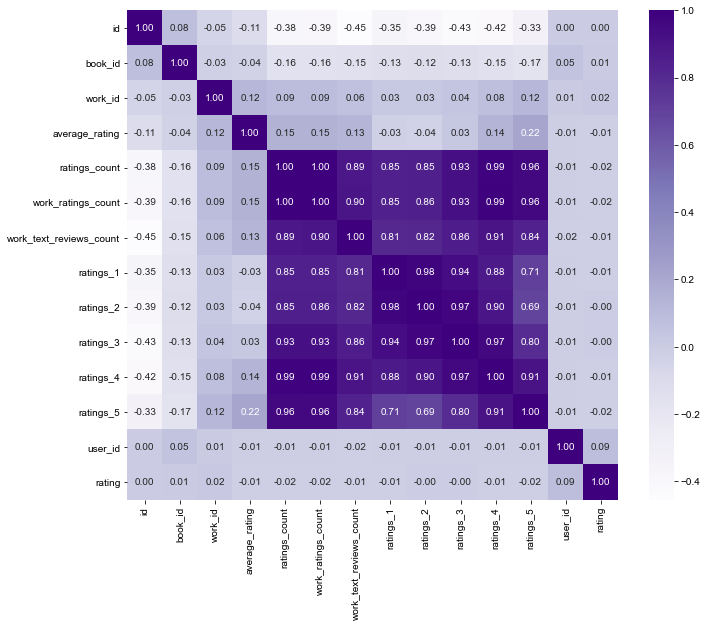

In [36]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

We observe some strong correlations